# Assignment 1: Uninformed Search

Matt Gorbett

## Overview


For this assignment, I implemented a breadthFirstSearch and depthFirstSearch algorithm described in 
[this](http://nbviewer.jupyter.org/url/www.cs.colostate.edu/~anderson/cs440/notebooks/03%20Problem-Solving%20Agents.ipynb) notebook.

The top function in this notebook, searchNodes, implements both breadth and depth first algorithms.  By passing in a boolean variable titled breadthFirst, I am able to signify which search to run.  searchNodes' 3 other arguments are the startState, endState, and successorsf function, which are all input requirements to their respective functions, breadthFirstSearch and depthFirstSearch.  

breadthFirstSearch and depthFirstSearch both take in a "successor" function, which have been predefined in the example code as successorsf and gridSuccessors.  I also implemented a camelSuccessorsf function for extra credit. 

### Notes

-  This was an interesting implementation of these algorithms.  I first tried out my own separate algorithms to see if I could write the functions with the correct number of steps for the output.  I tried this out for many hours before moving on to the main combined function.


-  The notes on writing the searchNodes function were very helpful.  I was able to write these mostly step by step, with a bunch of testing in between to make sure the step ran correctly.  


-  One line that was particularly tricky was implementing the tupling.  Iterating through both children and currentState[0] inline to add into a tuple object was a little hard for me to figure out.  


-  I had a lot of fun with trying out the CamelSuccessfors extra credit, however I wasn't able to get the correct number of steps.  I was happy getting the function to run correctly and lower the number of steps taken by more than half.  The function seemed clean since it took in each case and built out the tree completely.  




In [134]:
def searchNodes(startState, goalState, successorsf, breadthFirst):
	expanded={}
	unExpanded=[(startState, None)] #add start to the unExpanded list
	if(startState==goalState):#no need to iterate through list if startState=goalState
		return [startState]
	while unExpanded: 
		currentState=unExpanded.pop() #pop from the end
		children=[child for child in successorsf(currentState[0]) if child!=currentState[0]] #get all children only if the child is not in the currentState
		cleanup=[]
		for child in children:
			if child not in expanded and (child,currentState) not in unExpanded and child!=currentState: #check if child is in expanded, unexpanded and make sure its not the currentState
				cleanup.append(child)
		children=cleanup
		for child in children:
			expanded[child]=currentState[0]#child parent/child to list that points the child to its parent

		if(currentState[0] not in expanded):
			expanded[currentState[0]] = currentState[1]
		
		if(goalState in children):
			solution=[currentState[0],goalState]
			currentState=expanded[currentState[0]]
			while currentState:
				solution.insert(0,currentState)
				currentState=expanded[currentState] #set child to parent and keep iterating up
			return solution

		
		children.sort()
		children.reverse()#handy function to reverse order of list
		children_tupled=[(child,parent) for child in children for parent in currentState[0] ] #create child and parent tuples
		
		if(breadthFirst): 
			unExpanded=children_tupled+unExpanded#add tuples to front of list
		else:
			unExpanded.extend(children_tupled)#depthFirst, add tuples to end of list
	return "Goal not found"


def breadthFirstSearch(startState, goalState, successorsf):
    return searchNodes(startState, goalState, successorsf, True)


def depthFirstSearch(startState, goalState, successorsf):
    return searchNodes(startState, goalState, successorsf, False)

# Test runs

These are the example runs I ran from the original notebook.  I added the a->Denver test case to test that the script would work.  

In [135]:
successors = {'a':  ['b', 'c', 'd'],
              'b':  ['e', 'f', 'g'],
              'c':  ['a', 'h', 'i'],
              'd':  ['j', 'z'],
              'e':  ['k', 'l'],
              'g':  ['m'],
              'k':  ['z']}
successors

{'a': ['b', 'c', 'd'],
 'b': ['e', 'f', 'g'],
 'c': ['a', 'h', 'i'],
 'd': ['j', 'z'],
 'e': ['k', 'l'],
 'g': ['m'],
 'k': ['z']}

In [136]:
import copy

def successorsf(state):
    return copy.copy(successors.get(state, []))

In [137]:
successorsf('e')

['k', 'l']

In [138]:
print('Breadth-first')
print('path from a to a is', breadthFirstSearch('a', 'a', successorsf))
print('path from a to m is', breadthFirstSearch('a', 'm', successorsf))
print('path from a to z is', breadthFirstSearch('a', 'z', successorsf))
print('path from a to b is', breadthFirstSearch('a', 'b', successorsf))
print('path from a to denver is', breadthFirstSearch('a', 'denver', successorsf))  #from grading script

Breadth-first
('path from a to a is', ['a'])
('path from a to m is', ['a', 'b', 'g', 'm'])
('path from a to z is', ['a', 'd', 'z'])
('path from a to b is', ['a', 'b'])
('path from a to denver is', 'Goal not found')


In [139]:
print('Depth-first')
print('path from a to a is', depthFirstSearch('a', 'a', successorsf))
print('path from a to m is', depthFirstSearch('a', 'm', successorsf))
print('path from a to z is', depthFirstSearch('a', 'z', successorsf))
print('path from a to b is', depthFirstSearch('a', 'b', successorsf))
print('path from a to denver is', depthFirstSearch('a', 'denver', successorsf)) #from grading script

Depth-first
('path from a to a is', ['a'])
('path from a to m is', ['a', 'b', 'g', 'm'])
('path from a to z is', ['a', 'b', 'e', 'k', 'z'])
('path from a to b is', ['a', 'b'])
('path from a to denver is', 'Goal not found')


Let's try a navigation problem around a grid of size 10 x 10. Rows and columns will be indexed from 0 to 9.

The following function takes the input state and returns all possible states.

In [140]:
def gridSuccessors(state):
    row, col = state
    # succs will be list of tuples () rather than list of lists [] because state must
    # be an immutable type to serve as a key in dictionary of expanded nodes
    succs = []
    for r in [-1, 0, 1]:   #check each row
        for c in [-1, 0, 1]:  # check in each col
            newr = row + r
            newc = col + c
            if 0 <= newr <= 9 and 0 <= newc <= 9:  
                succs.append( (newr, newc) )
    return succs

In [141]:
gridSuccessors([3,4])

[(2, 3), (2, 4), (2, 5), (3, 3), (3, 4), (3, 5), (4, 3), (4, 4), (4, 5)]

In [142]:
gridSuccessors([3,9])

[(2, 8), (2, 9), (3, 8), (3, 9), (4, 8), (4, 9)]

In [143]:
gridSuccessors([0,0])

[(0, 0), (0, 1), (1, 0), (1, 1)]

In [144]:
print('Breadth-first')
print('path from (0, 0) to (9, 9) is', breadthFirstSearch((0, 0), (9, 9), gridSuccessors))

Breadth-first
('path from (0, 0) to (9, 9) is', [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9)])


In [145]:
print('Depth-first')
print('path from (0, 0) to (9, 9) is', depthFirstSearch((0, 0), (9, 9), gridSuccessors))

Depth-first
('path from (0, 0) to (9, 9) is', [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (1, 9), (2, 8), (2, 7), (2, 6), (2, 5), (2, 4), (2, 3), (2, 2), (2, 1), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 1), (8, 2), (7, 2), (6, 2), (5, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (5, 9), (6, 8), (6, 7), (6, 6), (6, 5), (7, 4), (8, 4), (9, 5), (8, 6), (8, 7), (8, 8), (9, 9)])


Let's plot the paths.

In [146]:
path = depthFirstSearch((0, 0), (9, 9), gridSuccessors)
path

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (1, 9),
 (2, 8),
 (2, 7),
 (2, 6),
 (2, 5),
 (2, 4),
 (2, 3),
 (2, 2),
 (2, 1),
 (3, 0),
 (4, 0),
 (5, 0),
 (6, 0),
 (7, 0),
 (8, 0),
 (9, 1),
 (8, 2),
 (7, 2),
 (6, 2),
 (5, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (5, 9),
 (6, 8),
 (6, 7),
 (6, 6),
 (6, 5),
 (7, 4),
 (8, 4),
 (9, 5),
 (8, 6),
 (8, 7),
 (8, 8),
 (9, 9)]

Now, we have the path to goal state. To plot this path we must extract the first value in each tuple and put them in a list called `rows` to use as the $y$ coordinate of each point, and build a second list called `cols` of second values.

In [147]:
import matplotlib.pyplot as plt
%matplotlib inline

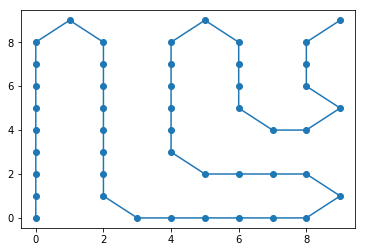

In [148]:
rows = [location[0] for location in path]
cols = [location[1] for location in path]
plt.plot(rows,cols,'o-');

[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9)]


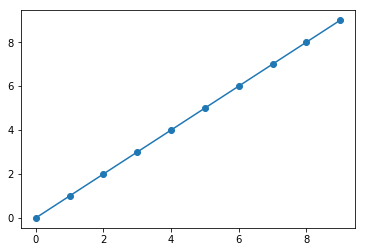

In [149]:
path = breadthFirstSearch((0, 0), (9, 9), gridSuccessors)
print(path)
rows = [location[0] for location in path]
cols = [location[1] for location in path]
plt.plot(rows,cols,'o-');

In [150]:
depthFirstSearch((0, 0), (9, 20), gridSuccessors)

'Goal not found'

### Other functions

These were some initial functions I tried out to get reacquainted with breadth first and depth first search.  I tried out several different methods which worked on the base successorsf function, these were my last versions of these algorithms.  

In [151]:
#original breadth first search attempt
def breadthFirstSearch_original(startState, goalState, successorsf):
	queue = [startState]
	parent = {} 
	parent[startState]= 0    
	visited=[startState]
	while queue:
		node=queue.pop(0)
		children=successorsf(node)
		for child in children:
			if child not in visited:
				queue.append(child)
				visited.append(child)
				parent[child]= node
				if(child==goalState):
					holder=child
					break;
	steps_list=[]	
	while holder!=0:
		steps_list.append(holder)
		holder=parent[holder]
	return list(reversed(steps_list))
	
# original depth first search attempt
def depthFirstSearch_original(startState, goalState, successorsf):
    parent = {}
    parent[startState]= 0 
    parent = dfs(successorsf, startState, parent, goalState)
    steps_list=[]
    print(parent)
    holder=goalState
    while holder!=0:
        steps_list.append(holder)
        holder=parent[holder]
    return list(reversed(steps_list))



def dfs(startState, goalState, successorsf):
	parent = {}
	stack=[]
	parent[startState]= 0 
	stack.append(startState);
	visited=[startState]
	while(len(stack)>0):
		children= successorsf(stack[-1])
		hasUnvisitedChild=next((child for child in children if child not in visited), "None")			
		if(hasUnvisitedChild!="None"):
			index=children.index(hasUnvisitedChild)
			if(children[index]==goalState):
				break;
			visited.append(children[index])
			stack.append(children[index])
		else:
			stack.pop()
	return stack

In [152]:
def breadthFirstSearch_First(startState, goalState, successorsf):
	queue = [startState]
	parent = {} 
	parent[startState]= 0    
	visited=[startState]
	while queue:
		node=queue.pop(0)
		children=successorsf(node)
		for child in children:
			successorsf(child).append(node)
		for child in children:
			if child not in visited:
				queue.append(child)
				visited.append(child)
				parent[child]= node
				if(child==goalState):
					holder=child
					break;
	steps_list=[]	
	while holder!=0:
		steps_list.append(holder)
		holder=parent[holder]
	return list(reversed(steps_list))

# Extra Credit

For extra credit, use your functions to solve the Camels Puzzle, described at [Logic Puzzles](http://www.folj.com/puzzles/).
The following code illustrates one possible state representation and shows results of a breadth-first and a dept-first search.  You must define a new successors function, called `camelSuccessorsf`. 

In [153]:
camelStartState=('R', 'R', 'R', 'R', ' ', 'L', 'L', 'L', 'L')
camelGoalState=('L', 'L', 'L', 'L', ' ', 'R', 'R', 'R', 'R')

'''Keeping this as a script-y function to illustrate logic used. 
Depending on where the space is, I create new states by flipping the space with its neighbors.  
For most states, four new copies can be made by flipping the space with its neighbors from 
index-2 to index+2.  Exceptions are made when the space gets closer to the end.  
''' 
def camelSuccessorsf(state):

	empty_loc=state.index(' ')

	copy1=list(state)
	copy2=list(state)
	copy3=list(state)
	copy4=list(state)
	if(empty_loc==0):
		copy1[empty_loc+2], copy1[empty_loc] = copy1[empty_loc], copy1[empty_loc+2]
		return [tuple(copy1)]

	elif(empty_loc ==1):
		copy1[empty_loc-1], copy1[empty_loc] = copy1[empty_loc], copy1[empty_loc-1]
		copy2[empty_loc+1], copy2[empty_loc] = copy2[empty_loc], copy2[empty_loc+1]
		copy3[empty_loc+2], copy3[empty_loc] = copy3[empty_loc], copy3[empty_loc+2]
		return tuple(copy1),tuple(copy2),tuple(copy3)

	elif(empty_loc==7):
		copy1[empty_loc-1], copy1[empty_loc] = copy1[empty_loc], copy1[empty_loc-1]
		copy2[empty_loc+1], copy2[empty_loc] = copy2[empty_loc], copy2[empty_loc+1]
		copy3[empty_loc-2], copy3[empty_loc] = copy3[empty_loc], copy3[empty_loc-2]
		return tuple(copy3),tuple(copy1),tuple(copy2)
	elif(empty_loc ==8):
		copy1[empty_loc-2], copy1[empty_loc] = copy1[empty_loc], copy1[empty_loc-2]
		return [tuple(copy1)]

	else:
		copy1[empty_loc-1], copy1[empty_loc] = copy1[empty_loc], copy1[empty_loc-1]
		copy2[empty_loc+1], copy2[empty_loc] = copy2[empty_loc], copy2[empty_loc+1]
		copy3[empty_loc+2], copy3[empty_loc] = copy3[empty_loc], copy3[empty_loc+2]
		copy4[empty_loc-2], copy4[empty_loc] = copy4[empty_loc], copy4[empty_loc-2]
		return tuple(copy4),tuple(copy1),tuple(copy2), tuple(copy3)


In [154]:
camelStartState

('R', 'R', 'R', 'R', ' ', 'L', 'L', 'L', 'L')

In [155]:
camelGoalState

('L', 'L', 'L', 'L', ' ', 'R', 'R', 'R', 'R')

In [156]:
camelSuccessorsf(camelStartState)

(('R', 'R', ' ', 'R', 'R', 'L', 'L', 'L', 'L'),
 ('R', 'R', 'R', ' ', 'R', 'L', 'L', 'L', 'L'),
 ('R', 'R', 'R', 'R', 'L', ' ', 'L', 'L', 'L'),
 ('R', 'R', 'R', 'R', 'L', 'L', ' ', 'L', 'L'))

In [157]:
children = camelSuccessorsf(camelStartState)
print(children[0])
camelSuccessorsf(children[0])

('R', 'R', ' ', 'R', 'R', 'L', 'L', 'L', 'L')


((' ', 'R', 'R', 'R', 'R', 'L', 'L', 'L', 'L'),
 ('R', ' ', 'R', 'R', 'R', 'L', 'L', 'L', 'L'),
 ('R', 'R', 'R', ' ', 'R', 'L', 'L', 'L', 'L'),
 ('R', 'R', 'R', 'R', ' ', 'L', 'L', 'L', 'L'))

In [158]:
bfs = breadthFirstSearch(camelStartState, camelGoalState, camelSuccessorsf)
print('Breadth-first solution: (', len(bfs), 'steps)')
for s in bfs:
    print(s)

dfs = depthFirstSearch(camelStartState, camelGoalState, camelSuccessorsf)
print('Depth-first solution: (', len(dfs), 'steps)')
for s in dfs:
    print(s)

('Breadth-first solution: (', 27, 'steps)')
('R', 'R', 'R', 'R', ' ', 'L', 'L', 'L', 'L')
('R', 'R', 'R', ' ', 'R', 'L', 'L', 'L', 'L')
('R', 'R', 'R', 'L', 'R', ' ', 'L', 'L', 'L')
('R', 'R', 'R', 'L', 'R', 'L', ' ', 'L', 'L')
('R', 'R', 'R', 'L', ' ', 'L', 'R', 'L', 'L')
('R', 'R', ' ', 'L', 'R', 'L', 'R', 'L', 'L')
('R', ' ', 'R', 'L', 'R', 'L', 'R', 'L', 'L')
('R', 'L', 'R', ' ', 'R', 'L', 'R', 'L', 'L')
('R', 'L', 'R', 'L', 'R', ' ', 'R', 'L', 'L')
('R', 'L', 'R', 'L', 'R', 'L', 'R', ' ', 'L')
('R', 'L', 'R', 'L', 'R', 'L', 'R', 'L', ' ')
('R', 'L', 'R', 'L', 'R', 'L', ' ', 'L', 'R')
('R', 'L', 'R', 'L', ' ', 'L', 'R', 'L', 'R')
('R', 'L', ' ', 'L', 'R', 'L', 'R', 'L', 'R')
('R', ' ', 'L', 'L', 'R', 'L', 'R', 'L', 'R')
(' ', 'R', 'L', 'L', 'R', 'L', 'R', 'L', 'R')
('L', 'R', ' ', 'L', 'R', 'L', 'R', 'L', 'R')
('L', ' ', 'R', 'L', 'R', 'L', 'R', 'L', 'R')
('L', 'L', 'R', ' ', 'R', 'L', 'R', 'L', 'R')
('L', 'L', 'R', 'L', 'R', ' ', 'R', 'L', 'R')
('L', 'L', 'R', 'L', 'R', 'L', 'R', 

In [159]:
%run -i A1grader.py


======================= Code Execution =======================

Extracting python code from notebook named 'Gorbett-A1.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.
('Searching this graph:\n', {'a': ['b'], 'c': ['e'], 'b': ['c', 'd'], 'e': ['g', 'h', 'i'], 'd': ['f', 'i']})

Looking for path from a to b.
  Calling breadthFirstSearch(a, b, successorsf)
      and depthFirstSearch(a, b, successorsf)
10/10 points. Your breadthFirstSearch found correct solution path of ['a', 'b']
10/10 points. Your depthFirstSearch found correct solution path of ['a', 'b']

Looking for path from a to i.
  Calling breadthFirstSearch(a, i, successorsf)
      and depthFirstSearch(a, i, successorsf)
20/20 points. Your breadthFirstSearch found correct solution path of ['a', 'b', 'd', 'i']
20/20 points. Your depthFirstSearch found correct solution path of ['a', 'b', 'c', 'e', 'i']

Looking for non-existant path from a to denver.
  Calling 

<Figure size 432x288 with 0 Axes>